In [10]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [2]:
# define quantum gate 

# Pauli-X gate (X)
X = np.array([
    [0, 1],
    [1, 0]
])

# Hadamard gate (H)
H = np.array([
    [1, 1],
    [1, -1]
]) / np.sqrt(2)

# CNOT gate as a tensor
CNOT = np.array([[[[1, 0], [0, 0]], [[0, 1], [0, 0]]],
                 [[[0, 0], [1, 0]], [[0, 0], [0, 1]]]])  

In [3]:
# apply gate to a qubit 
def apply_gate(gate, state_tensor, qubit):
    
    # contract axis 0 of gate with target qubit axis
    state_tmp = np.tensordot(gate, state_tensor, axes=([0], [qubit]))
    
    # move output axis from 0 to target qubit position
    return np.moveaxis(state_tmp, 0, qubit)

# apply CNOT gate to two selected qubits
def apply_cnot(gate, state_tensor, control_qubit, target_qubit):
    new_state = np.tensordot(gate, state_tensor, axes=([0, 1], [control_qubit, target_qubit]))
    if control_qubit > target_qubit:
        new_state = np.moveaxis(new_state, [0, 1], [control_qubit, target_qubit])
    else:
        new_state = np.moveaxis(new_state, [0, 1], [control_qubit, target_qubit])
    return new_state


In [4]:
# initialize statevector of n-qubit system
def initialize_statetensor(n):
    
    # randomly generate state vector of n qubit system
    s_0 = np.array([1, 0]) # state vector |0>
    s_1 = np.array([0, 1]) # state vector |1>
    each = [] # to store combined state vector
    s_nqubit = np.array([1])
    
    # randomly initialize each qubit to |0> or |1>
    for i in range(n):
        if np.random.rand() < 0.5:
            s = s_0 
            each.append(0)
        else:
            s = s_1 
            each.append(1)
        
        # state vector of i + 1 qubits
        s_nqubit = np.kron(s_nqubit, s)
        
    # transform state vector to n dimensional tensor with each dimension of size 2
    s_tensor = s_nqubit.reshape((2,) * n)
    
    return s_tensor

In [12]:
# Runtime analysis
qubits_range = range(2, 40)
runtimes = []
repetitions = 5  # repeat measure average runtime 

for n in qubits_range:
    state_tensor = initialize_statetensor(n)
    
    start_time = time.perf_counter()
    
    for _ in range(repetitions):  # repeat the gate sequence
        qubit1 = random.randint(0, n - 1)
        qubit2 = random.randint(0, n - 1)
        while qubit2 == qubit1:  # ensure the second qubit is different for the CNOT
            qubit2 = random.randint(0, n - 1)
    
        state_tensor = apply_gate(H, state_tensor, qubit1)  # apply H gate to qubit1
        state_tensor = apply_gate(X, state_tensor, qubit2)  # apply X gate to qubit2
        state_tensor = apply_gate(H, state_tensor, qubit1)  # apply H gate to qubit1
        state_tensor = apply_cnot(CNOT, state_tensor, qubit1, qubit2)  # apply CNOT between qubit1 and qubit2

    runtime = (time.perf_counter() - start_time) / repetitions  # average runtime per repetition
    runtimes.append(runtime)
    print("number of qubits:", n, "   runtime:", runtime)

# Plot runtime as a function of the number of qubits
plt.plot(qubits_range, runtimes, marker='o')
plt.xlabel('number of qubits')
plt.ylabel('average runtime (seconds)')
plt.grid()
plt.show()

# Analysis: Determine maximum number of qubits simulated
max_qubits_simulated = qubits_range[-1] if runtimes[-1] < 10 else max(q for q, t in zip(qubits_range, runtimes) if t < 10)
print(f"Maximum number of qubits simulated within reasonable time: {max_qubits_simulated}")



number of qubits: 2    runtime: 0.0008142000000134431
number of qubits: 3    runtime: 0.0002052800000001298
number of qubits: 4    runtime: 0.0001236800000015137
number of qubits: 5    runtime: 0.00014566000002105283
number of qubits: 6    runtime: 0.00010902000001351553
number of qubits: 7    runtime: 0.00015762000000449917
number of qubits: 8    runtime: 0.0001414399999930538
number of qubits: 9    runtime: 0.00013118000001668406
number of qubits: 10    runtime: 0.00013644000000567758
number of qubits: 11    runtime: 0.00018094000001838139
number of qubits: 12    runtime: 0.0001771599999983664
number of qubits: 13    runtime: 0.00019444000001840324
number of qubits: 14    runtime: 0.00022217999999156745
number of qubits: 15    runtime: 0.0005643800000143528
number of qubits: 16    runtime: 0.002144159999988915
number of qubits: 17    runtime: 0.0037847800000008645
number of qubits: 18    runtime: 0.008493619999990187
number of qubits: 19    runtime: 0.01796950000000379
number of qubi

MemoryError: Unable to allocate 8.00 GiB for an array with shape (2, 536870912) and data type float64

In [22]:
runtime = [
    0.0008142000000134431,
    0.0002052800000001298,
    0.0001236800000015137,
    0.00014566000002105283,
    0.00010902000001351553,
    0.00015762000000449917,
    0.0001414399999930538,
    0.00013118000001668406,
    0.00013644000000567758,
    0.00018094000001838139,
    0.0001771599999983664,
    0.00019444000001840324,
    0.00022217999999156745,
    0.0005643800000143528,
    0.002144159999988915,
    0.0037847800000008645,
    0.008493619999990187,
    0.01796950000000379,
    0.02607805999998618,
    0.07244944000001396,
    0.1279556199999888,
    0.2509943000000021,
    0.47623849999999945,
    1.072225760000015,
    2.4190360199999987,
    4.153622880000012,
    8.939842739999994,
    28.08849995999999
]

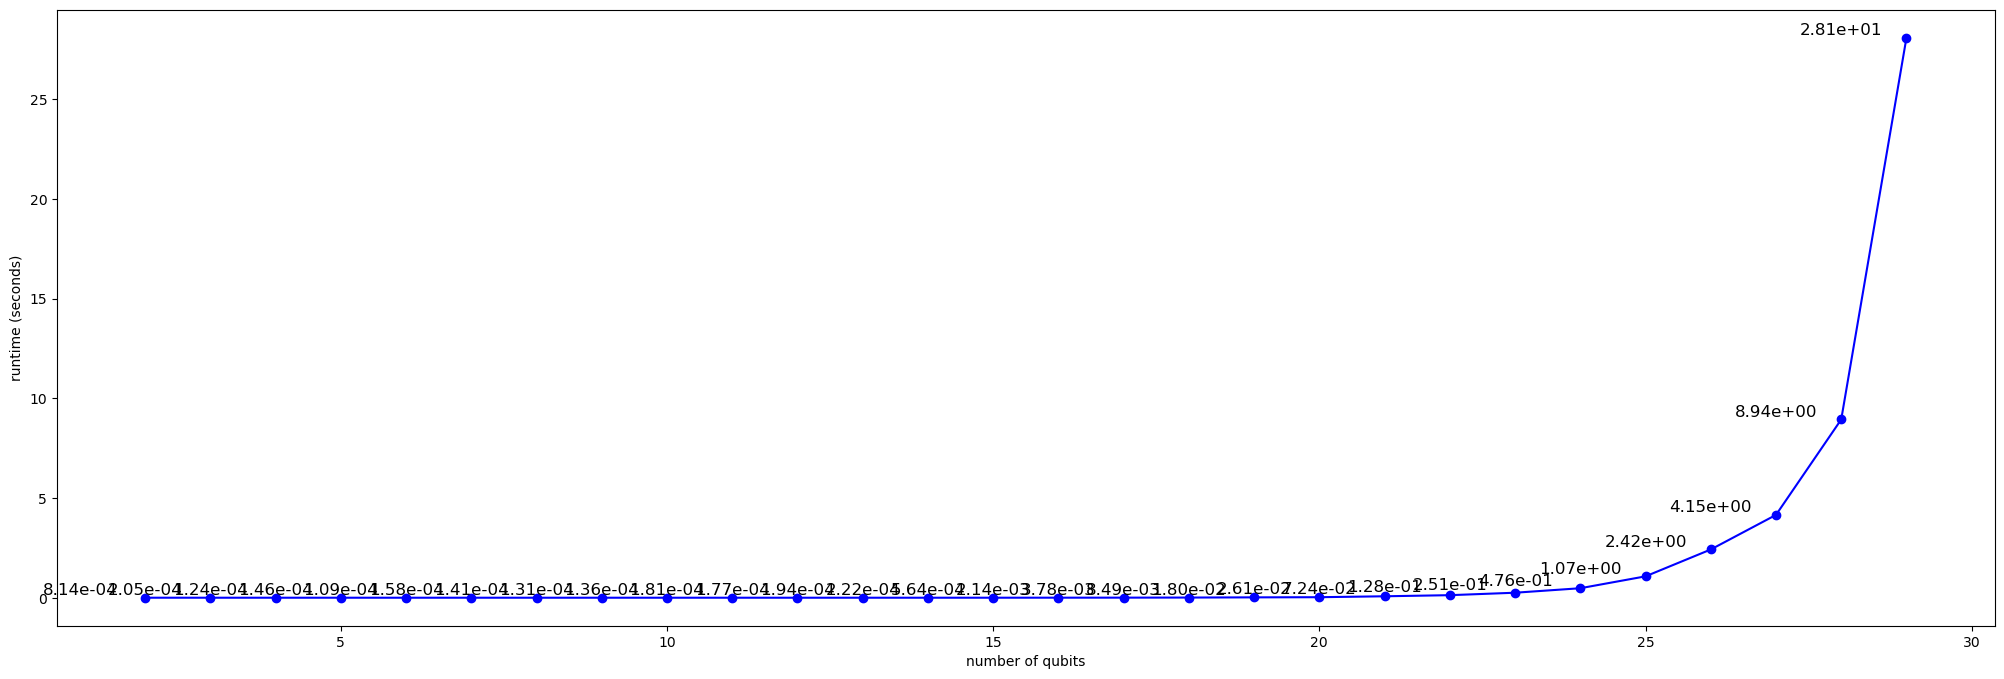

In [24]:
# plot runtime
plt.figure(figsize=(25, 8))
plt.plot(np.arange(2, 29 + 1), runtime, marker='o', linestyle='-', color='b')

for i, y in enumerate(runtime):
    plt.text(i + 1, y, f"{y:.2e}", ha='center', va='bottom', fontsize=12)

plt.xlabel('number of qubits')
plt.ylabel('runtime (seconds)')
plt.show()

#### conclusion:
##### because of the use of repeated run for each n qubit system, the memory limit reached earlier, at 29 qubits, and takes 28 secs. The growth of simulation time is exponential, roughly by 4 because the matrix grows by 2 x 2 times with an increment in n. With 12 more qubits, it will exceed one day for such a simulation. But this method can tackle more qubits than part1.